In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv(r'C:\Users\TARUN\OneDrive\Desktop\sales data file.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


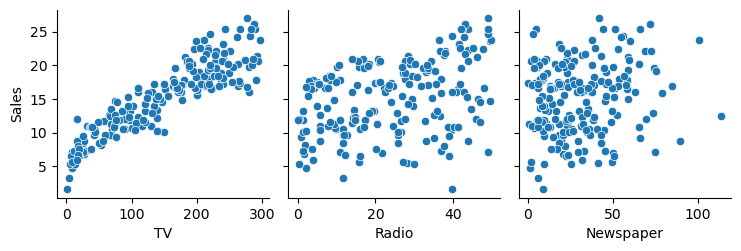

In [12]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind = 'scatter')
plt.show()

<Axes: ylabel='Frequency'>

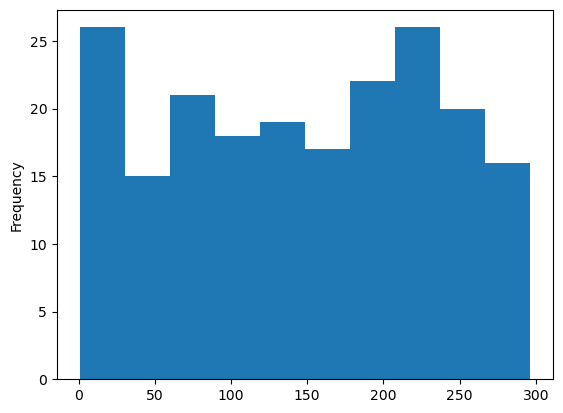

In [13]:
data['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

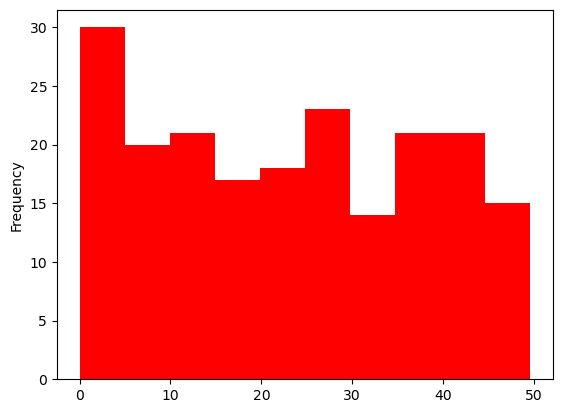

In [17]:
data['Radio'].plot.hist(bins=10, color='red')

<Axes: ylabel='Frequency'>

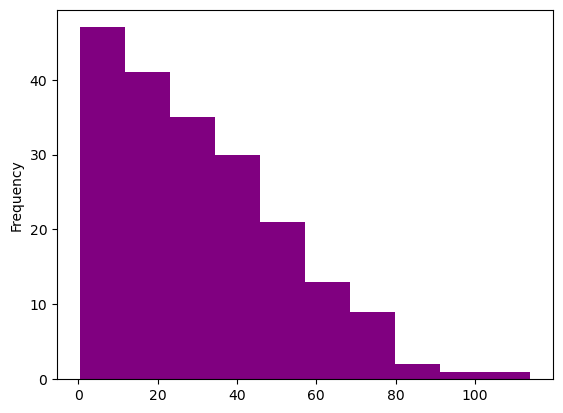

In [16]:
data['Newspaper'].plot.hist(bins=10, color='purple')

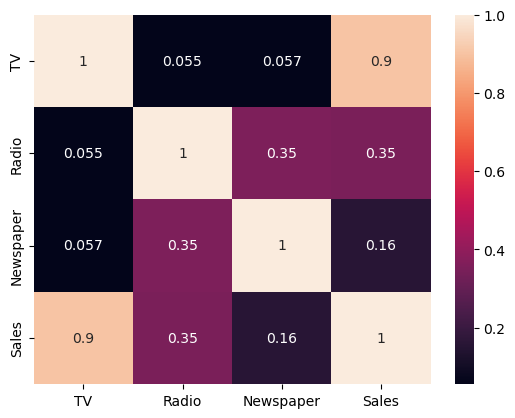

In [18]:
sns.heatmap(data.corr(),annot=True)
plt.show()

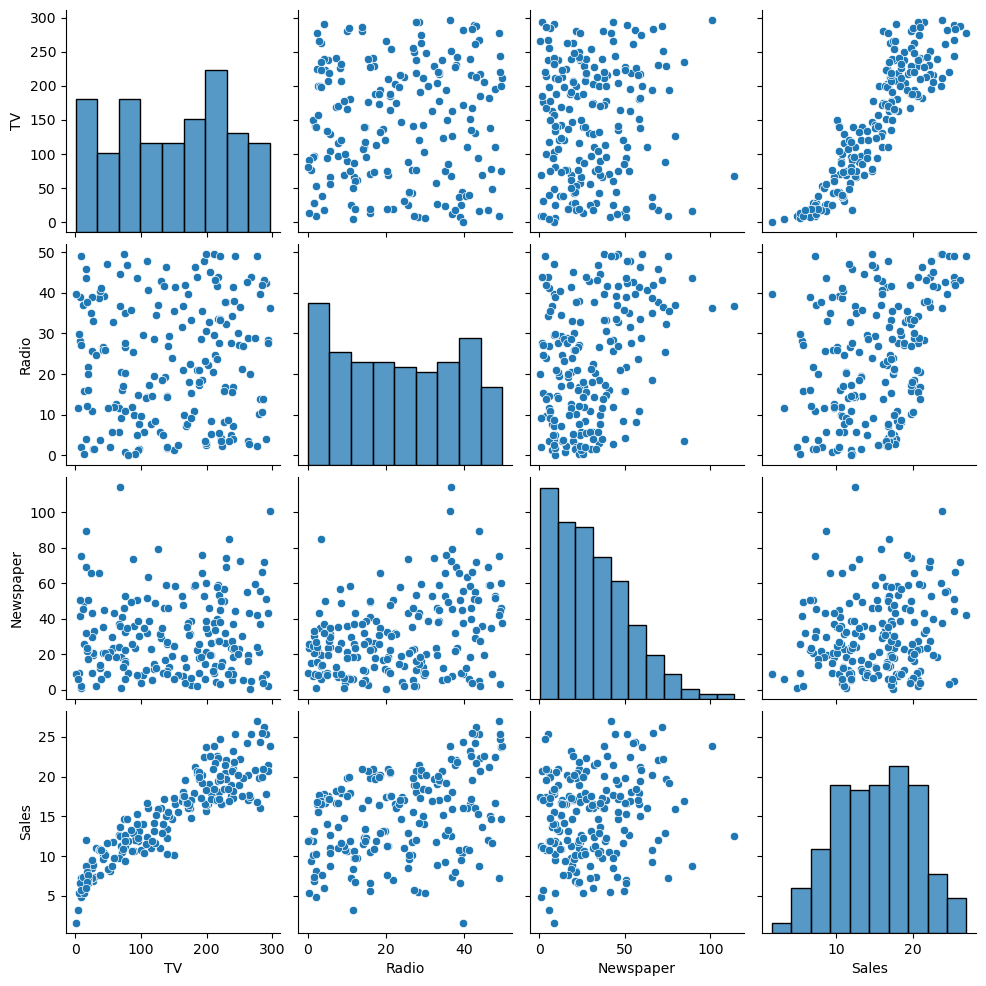

In [30]:
sns.pairplot(data=data)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['TV']],data[['Sales']], test_size=0.3,random_state=0)

In [21]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [22]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [34]:
x_test

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2
182,56.2
5,8.7
146,240.1
12,23.8
152,197.6


In [33]:
y_test

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


In [36]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

C:\Users\TARUN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
y_predict = model.predict(x_test_scaled)
print(y_predict)

[11 11 11 20 17 11 11 20 11 17 20 11 17 17 11 16 20 11 11 20 20 16 17 16
 11 16 17 17 20 11 11 17 20 20 11 11 11 17 11 11 11 11 16 17 20 11 11 11
 16 11 11 20 20 17 11 11 20 17 17 11]


In [46]:
y_test

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


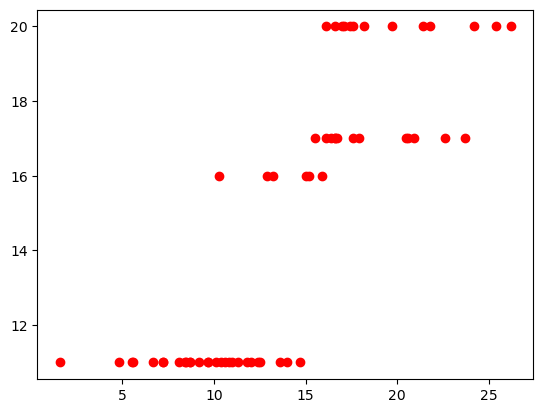

In [53]:
plt.scatter(y_test, y_predict , c='red')

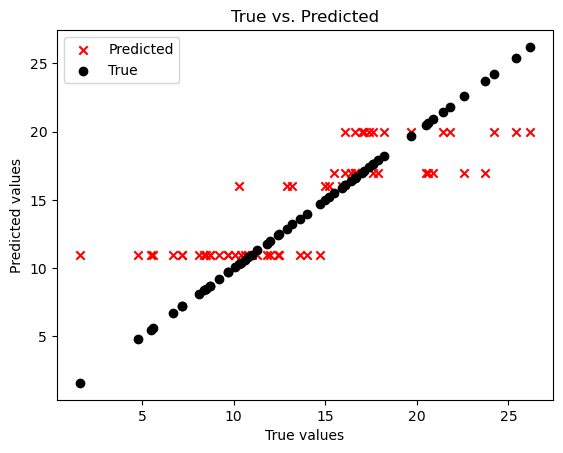

In [54]:
plt.scatter(y_test, y_predict , c='red' ,label = 'Predicted', marker = 'x')
plt.scatter(y_test, y_test , c='black' ,label = 'True', marker = 'o')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs. Predicted')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)

In [58]:
mse

10.544833333333335

In [59]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

In [60]:
mae

2.558333333333333

In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

In [62]:
r2

0.6497706294421142